<a href="https://colab.research.google.com/github/BOTnreLI/LinearRegressor_withsklearn/blob/main/674Finalproject_regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

#import for LSTM model
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.engine.input_layer import InputLayer
from keras.backend import dropout

Defining Libraries for usages

In [334]:
def replacement(X):
  if(X == 7 or X == 1):
    return 1
  else: 
    return 0

def compute_mse(model, X, y_true, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f'Mean Squared Error for {name}: {mse}')
    print()
    print(f'Mean Absolute percentage error for {name}: {mape}')
    print()
    print(f'Root Mean Squared Error for {name}: {rmse}')
    print()

def build_evaluate_fn(X_train, y_train, X_test, y_test):
    def evaluate(model):
        print()
        compute_mse(model, X_train, y_train, 'training set')
        compute_mse(model, X_test, y_test, 'test set')
        figure2 = plt.scatter
    
    return evaluate

#evaluate = build_evaluate_fn(X_train, y_train, X_test, y_test)
#the definition above have to be defined before calling it.
def create_dataset(dataset, look_back=7):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
 
def timeSection_8(x):
    if(x == 2 or x == 3 or x == 4 or x == 5 or x == 6 or x == 7 or x == 8 or x == 9):
      return 1
    elif(x == 10 or x == 11 or x == 12 or x == 13 or x == 14 or x == 15 or x == 16 or x == 17):
      return 2
    elif(x == 18 or x == 19 or x == 20 or x == 21 or x == 22 or x == 23 or x == 24 or x == 1):
      return 3
    else: return 0

def timeSection_6(x):
    if(x == 2 or x == 3 or x == 4 or x == 5 or x == 6 or x == 7):
      return 1
    elif(x == 8 or x == 9 or x == 10 or x == 11 or x == 12 or x == 13):
      return 2
    elif(x == 14 or x == 15 or x == 16 or x == 17 or x == 18 or x == 19):
      return 3
    elif(x == 20 or x == 21 or x == 22 or x == 23 or x == 24 or x == 1):
      return 4
    else: return 0

Self-defined functions

In [335]:
df = pd.read_csv('/content/drive/MyDrive/674Project_inputFinal - Sheet4.csv')

print(df.shape)
df.head()

(8921, 14)


,Date,Time,AM/PM,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,Day-of-Week,Day-Ahead-LMP-price
0,4/1/2021,12:51:00,AM,55.0,53.0,93.0,SE,5.0,0.0,29.59,0.1,Light Rain,5,17.96
1,4/1/2021,1:51:00,AM,54.0,52.0,93.0,NNW,12.0,0.0,29.55,0.0,Light Rain,5,16.05
2,4/1/2021,2:51:00,AM,49.0,45.0,86.0,NW,14.0,0.0,29.51,0.0,Light Rain,5,15.21
3,4/1/2021,3:51:00,AM,49.0,43.0,80.0,NNW,10.0,0.0,29.49,0.0,Cloudy,5,16.17
4,4/1/2021,4:51:00,AM,47.0,43.0,86.0,NNW,14.0,0.0,29.48,0.0,Light Drizzle,5,17.37


In [336]:
df["Condition"] = df["Condition"].astype('category')
df["Condition_cat"] = df["Condition"].cat.codes

In [337]:
df['Day-Ahead-LMP-price'].fillna((df['Day-Ahead-LMP-price'].mean()), inplace=True)
df = df.drop(columns=['Wind', 'Wind Speed', 'Wind Gust', 'Precip.'])

df = df.fillna({"Condition": "Fair"})
df = df.fillna({"Pressure": 29.816515})
df = df.fillna({"Temperature": 52.257598})
df = df.fillna({"Dew Point": 40.553549})
df = df.fillna({"Humidity": 67.807671})

In [338]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Date, Time, AM/PM, Temperature, Dew Point, Humidity, Pressure, Condition, Day-of-Week, Day-Ahead-LMP-price, Condition_cat]
Index: []


In [339]:
df['Day-of-Week'] = df['Day-of-Week'].astype('int')
df['WeekDay-WeekEnd'] = df['Day-of-Week'].apply(replacement)

In [340]:
def replace_2(X1, X2):
  if(X2 =='AM'):
    return X1
  elif(X2 == 'PM'):
    return X1+12
  else:
    return 0

df['Date'] = pd.to_datetime(df['Date'], 
 infer_datetime_format=True)

df['Date_year'] = df['Date'].dt.year
df['Date_month'] = df['Date'].dt.month
df['Date_day'] = df['Date'].dt.day

df['Time'] = pd.to_datetime(df['Time'], 
 infer_datetime_format=True,
 format='%H:%M:%S').dt.hour

df['24Hours'] = df.apply(lambda df: replace_2(df['Time'], df['AM/PM']), axis=1)


In [341]:
df['24Hours'].describe()

count    8921.000000
mean       12.498711
std         6.922442
min         1.000000
25%         7.000000
50%        12.000000
75%        19.000000
max        24.000000
Name: 24Hours, dtype: float64

In [342]:
df['Time_8'] = df['24Hours'].apply(timeSection_8)
df['Time_6'] = df['24Hours'].apply(timeSection_6)

Data preprocessing, filling empty Day-head LMP price with mean price from historical data, and encoding weekdays(1-7) into zero(weekday) and one(weekend).

In [343]:
scaler = MinMaxScaler(feature_range=(0, 1))

X = df.drop(columns='Day-Ahead-LMP-price')
Y = scaler.fit_transform(df['Day-Ahead-LMP-price'].values.reshape(-1, 1))

In [344]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,Temperature,Dew Point,Humidity,Pressure,Day-of-Week,Day-Ahead-LMP-price,Condition_cat,WeekDay-WeekEnd,Date_year,Date_month,Date_day,24Hours,Time_8,Time_6
Time,1.000000,-0.012091,0.008690,0.018060,0.039702,-0.003895,0.016518,-0.017850,-0.000868,0.003317,-0.003297,-0.002896,0.498666,0.294512,0.259481
Temperature,-0.012091,1.000000,0.886459,0.007855,-0.190762,0.000093,-0.553965,0.140308,-0.029221,-0.607888,0.302168,0.001196,0.144506,0.101615,0.113410
Dew Point,0.008690,0.886459,1.000000,0.460890,-0.251819,0.009226,-0.528326,0.100080,-0.026057,-0.589909,0.361418,-0.012371,0.009032,0.010215,0.010352
Humidity,0.018060,0.007855,0.460890,1.000000,-0.197582,0.029249,-0.105511,-0.049779,-0.001354,-0.115854,0.204965,-0.034914,-0.270081,-0.187927,-0.208312
Pressure,0.039702,-0.190762,-0.251819,-0.197582,1.000000,0.010986,0.211146,-0.101252,-0.061558,0.080435,0.001550,-0.100807,-0.031342,-0.029451,-0.027704
Day-of-Week,-0.003895,0.000093,0.009226,0.029249,0.010986,1.000000,-0.008253,0.005455,0.004696,-0.002355,0.003006,-0.020473,-0.002473,-0.003156,-0.003735
Day-Ahead-LMP-price,0.016518,-0.553965,-0.528326,-0.105511,0.211146,-0.008253,1.000000,0.004025,-0.043496,0.591714,-0.326601,0.075330,0.061094,0.029844,0.031612
Condition_cat,-0.017850,0.140308,0.100080,-0.049779,-0.101252,0.005455,0.004025,1.000000,-0.013281,-0.037354,0.004965,0.044501,0.029709,-0.005088,0.003924
WeekDay-WeekEnd,-0.000868,-0.029221,-0.026057,-0.001354,-0.061558,0.004696,-0.043496,-0.013281,1.000000,0.008219,-0.018351,-0.004728,0.005190,0.004078,0.004266
Date_year,0.003317,-0.607888,-0.589909,-0.115854,0.080435,-0.002355,0.591714,-0.037354,0.008219,1.000000,-0.763814,-0.029648,0.000074,0.000775,-0.000080


In [345]:

X = X.drop(columns=['Date', 'AM/PM', 'Condition', 'Date_year', 'Time'])
print(X)

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


      Temperature  Dew Point  Humidity  Pressure  Day-of-Week  Condition_cat  \
0            55.0       53.0      93.0     29.59            5             19   
1            54.0       52.0      93.0     29.55            5             19   
2            49.0       45.0      86.0     29.51            5             19   
3            49.0       43.0      80.0     29.49            5              2   
4            47.0       43.0      86.0     29.48            5             16   
...           ...        ...       ...       ...          ...            ...   
8916         59.0       55.0      87.0     29.34            5             19   
8917         59.0       57.0      93.0     29.32            5             19   
8918         61.0       58.0      90.0     29.28            5             20   
8919         60.0       55.0      83.0     29.32            5             19   
8920         58.0       54.0      87.0     29.32            5             19   

      WeekDay-WeekEnd  Date_month  Date

In [346]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [347]:
prediction_LinearRegression = model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_LinearRegression)

In [348]:
print(mean_squared_score)

0.010822166096736714


In [349]:
regressorSVR = LinearSVR()
regressorSVR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR()

In [350]:
prediction_LinearSVR = regressorSVR.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_LinearSVR)
print(mean_squared_score)

0.008884658454054145


In [322]:
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [323]:
prediction_lasso = lasso_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_lasso)

In [324]:
RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)

Evaluating models: LinearRegressor, SVR, RidgeCV, Lasso.

In [351]:
evaluate = build_evaluate_fn(X_train, y_train, X_test, y_test)
print('Error for linear regressor')
evaluate(model)
print('------------------------------')
print('Error for SVR')
evaluate(regressorSVR)

Error for linear regressor

Mean Squared Error for training set: 0.002721321366022808

Mean Absolute percentage error for training set: 29865955100.34946

Root Mean Squared Error for training set: 0.052166285721937385

Mean Squared Error for test set: 0.010822166096736714

Mean Absolute percentage error for test set: 0.4109390066934196

Root Mean Squared Error for test set: 0.10402964047201506

------------------------------
Error for SVR

Mean Squared Error for training set: 0.003300802682671362

Mean Absolute percentage error for training set: 55504686036.129456

Root Mean Squared Error for training set: 0.05745261249648585

Mean Squared Error for test set: 0.008884658454054145

Mean Absolute percentage error for test set: 0.45442434349308436

Root Mean Squared Error for test set: 0.09425846621950808



In [352]:
print('Error for lasso_model')
evaluate(lasso_model)
print('------------------------------')
print('Error for RidgeCV')
evaluate(RidgeCV_model)

Error for lasso_model

Mean Squared Error for training set: 0.0034883818112484426

Mean Absolute percentage error for training set: 71548910479.2863

Root Mean Squared Error for training set: 0.059062524592574286

Mean Squared Error for test set: 0.02858640553918544

Mean Absolute percentage error for test set: 0.6656155185194146

Root Mean Squared Error for test set: 0.1690751476095332

------------------------------
Error for RidgeCV

Mean Squared Error for training set: 0.0027244590624684734

Mean Absolute percentage error for training set: 28816436921.62873

Root Mean Squared Error for training set: 0.052196351045532614

Mean Squared Error for test set: 0.010950037113751091

Mean Absolute percentage error for test set: 0.40529108367726624

Root Mean Squared Error for test set: 0.10464242501849377



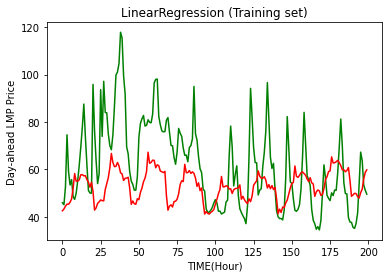

In [354]:
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_LinearRegression[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("LinearRegression (Training set)")
plt.xlabel("TIME(Hour)")
plt.ylabel("Day-ahead LMP Price")
plt.show()

Following will explor the impact from the number of features.
1. weather features
2. grouping time sections 

In [371]:
#Temperature only model 
X = df['Temperature'] + df['Dew Point']

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

6690
(4683,)
(2007,)
(4683, 1)
(2007, 1)


In [365]:
RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(mean_squared_score)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(mape)

0.030500457163706775
0.6960084276859004


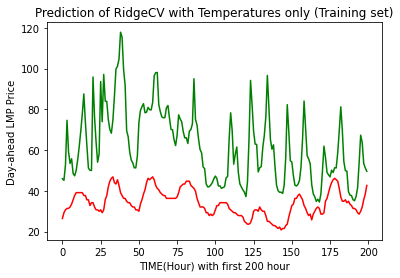

In [368]:
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 2)
(2007, 2)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.031746665607813654
Mean Absolute percentage error for mape: 0.7173852619721639
Mean Absolute percentage mean_squared_error with False squared: 0.1781759400362845


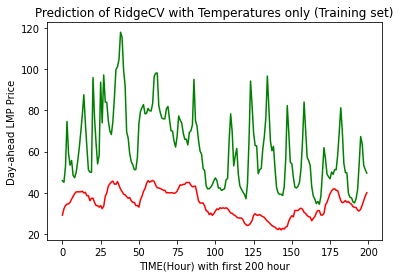

In [373]:
#Temperature only model 
X = df[['Temperature', 'Dew Point']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 3)
(2007, 3)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.03151203362518002
Mean Absolute percentage error for mape: 0.7164123168534641
Mean Absolute percentage mean_squared_error with False squared: 0.17751629115430512


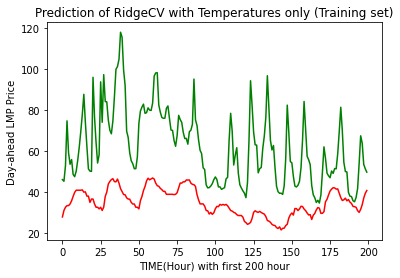

In [374]:
#Temperature only model 
X = df[['Temperature', 'Dew Point', 'Humidity']]
# Humidity  Pressure  Day-of-Week  Condition_cat
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 5)
(2007, 5)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.03138732799436791
Mean Absolute percentage error for mape: 0.7158580357699925
Mean Absolute percentage mean_squared_error with False squared: 0.177164691725998


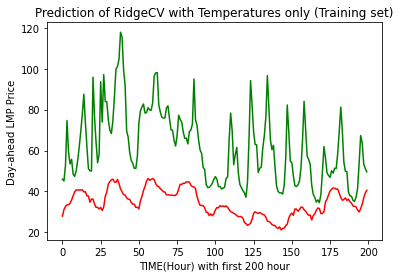

In [375]:
#Temperature only model 
X = df[['Temperature', 'Dew Point', 'Humidity', 'Humidity',  'Pressure']]
# Humidity  Pressure  Day-of-Week  Condition_cat
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 6)
(2007, 6)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.031221532152162647
Mean Absolute percentage error for mape: 0.7131464381976895
Mean Absolute percentage mean_squared_error with False squared: 0.17669615771759908


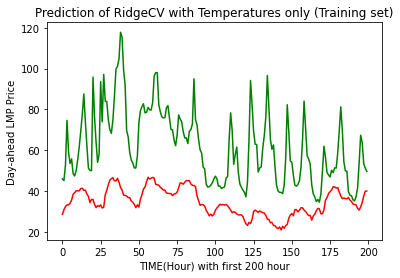

In [377]:
#Temperature only model 
X = df[['Temperature', 'Dew Point', 'Humidity', 'Humidity',  'Pressure', 'Condition_cat']]
# Humidity  Pressure  Day-of-Week  Condition_cat
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 7)
(2007, 7)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.03107665856134364
Mean Absolute percentage error for mape: 0.7143772839731697
Mean Absolute percentage mean_squared_error with False squared: 0.17628572988572738


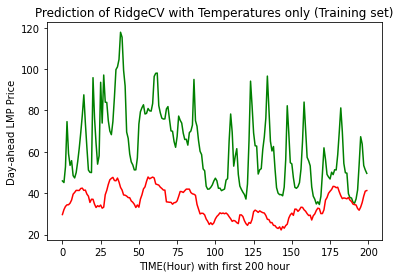

In [378]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 8)
(2007, 8)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.012292538087127982
Mean Absolute percentage error for mape: 0.4038078989082696
Mean Absolute percentage mean_squared_error with False squared: 0.11087171905913601


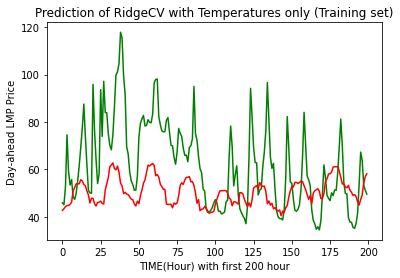

In [379]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 9)
(2007, 9)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.011471439850648272
Mean Absolute percentage error for mape: 0.41303049905922096
Mean Absolute percentage mean_squared_error with False squared: 0.10710480778493686


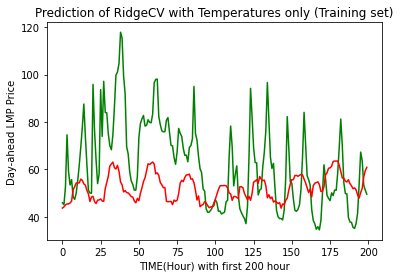

In [380]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month', 'Date_day']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 10)
(2007, 10)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.010905628420454092
Mean Absolute percentage error for mape: 0.4065287732470652
Mean Absolute percentage mean_squared_error with False squared: 0.10443001685556741


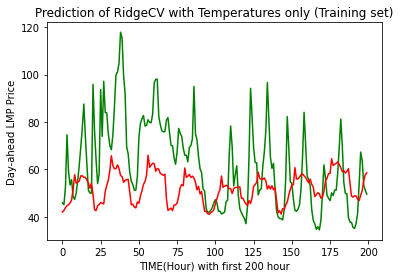

In [381]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month', 'Date_day', '24Hours']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 11)
(2007, 11)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.010895982500183638
Mean Absolute percentage error for mape: 0.40625436051210595
Mean Absolute percentage mean_squared_error with False squared: 0.10438382298126295


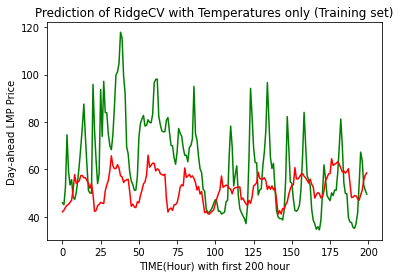

In [382]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month', 'Date_day', '24Hours', 'Time_8']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 12)
(2007, 12)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.010899727650708018
Mean Absolute percentage error for mape: 0.40633506836930877
Mean Absolute percentage mean_squared_error with False squared: 0.10440176076440483


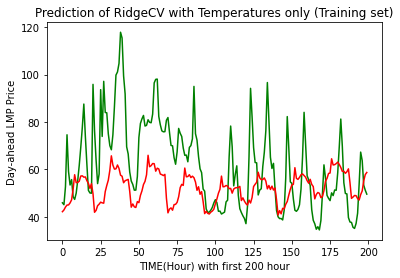

In [383]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month', 'Date_day', '24Hours', 'Time_8', 'Time_6']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

6690
(4683, 13)
(2007, 13)
(4683, 1)
(2007, 1)
Mean Absolute percentage error for Mean Squared Score: 0.010949915585541314
Mean Absolute percentage error for mape: 0.4052981645585762
Mean Absolute percentage mean_squared_error with False squared: 0.10464184433361882


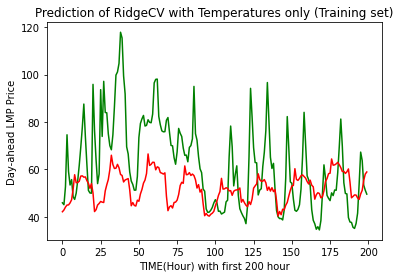

In [384]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month', 'Date_day', '24Hours', 'Time_8', 'Time_6', 'Day-of-Week']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for Mean Squared Score: {mean_squared_score}')
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'Mean Absolute percentage error for mape: {mape}')
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'Mean Absolute percentage mean_squared_error with False squared: {rmse}')
#evaluate(RidgeCV_model)
groundTruth = scaler.inverse_transform(y_test)
plt.plot(groundTruth[:200], color = "green")
plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color ='red')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only (Training set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
plt.show()

In [386]:
df['Day-Ahead-LMP-price'].describe()

count    8921.000000
mean       59.960829
std        43.882031
min        10.850000
25%        32.550000
50%        44.770000
75%        65.740000
max       274.750000
Name: Day-Ahead-LMP-price, dtype: float64